In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import odeint

In [131]:
class TwoBodyProblem:
    
    def __init__(self,m1,m2):
        
        self.m1 = m1
        self.m2 = m2
        self.M = m1 + m2
        self.mu = m1*m2/self.M
        
        self.G = 1
        
        self.alpha = self.G*self.m1*self.m2
        
    def dy_dt(self,y,t):
        
        dydt = np.zeros(12)
        
        dydt[:3] = y[6:9]
        dydt[3:6] = y[9:]
        dydt[6:9] = -self.alpha/m1 * (y[:3] - y[3:6]) / np.linalg.norm(y[:3]-y[3:6])
        dydt[9:] =  -self.alpha/m2 * (y[3:6] - y[:3]) / np.linalg.norm(y[:3]-y[3:6])
        
        return dydt
    
    def solve_ode(self,t_pts,r1_0,r2_0,v1_0,v2_0,abserr=1.0e-8, relerr=1.0e-6):
        
        y0 = np.zeros(12)
        
        y0[:3] = r1_0
        y0[3:6] = r2_0
        y0[6:9] = v1_0
        y0[9:] = v2_0
        
        y = odeint(self.dy_dt, y0, t_pts, 
                              atol=abserr, rtol=relerr).T
        
        r1 = y[:3]
        r2 = y[3:6]
        v1 = y[6:9]
        v2 = y[9:12]
        
        return r1, r2, v1, v2
        
    def orbits_plot(self,t_pts,r1_0,r2_0,v1_0,v2_0):
        
        r1, r2, v1, v2 = self.solve_ode(t_pts,r1_0,r2_0,v1_0,v2_0)
        
        
        # Inertial Frame
        fig1 = plt.figure()
        ax = fig1.add_subplot(1,1,1)
        
        #ax.plot(r1[0],r1[1],r1[2], label = r'm_{1} orbit')
        ax.plot(r1[0],r1[1],label = r'm1 orbit')
        
        
        #ax.plot(r2[0],r2[1],r2[2], label = r'm_{2} orbit')
        ax.plot(r2[0],r2[1], label = r'm2 orbit')
        
        ax.legend()
        
        
        ax.set_title('Orbits in Inertial Frame')
        
        # CM Frame
        R_cm = (self.m1*r1 + self.m2*r2)/(self.m1+self.m2)
        
        
        
        fig2 = plt.figure()
        ax = fig2.add_subplot(1,1,1)
        
        r_1 = self.M*(r1-R_cm)/self.m2
        r_2 = self.M*(R_cm-r2)/self.m1
        
        #ax.plot(r_1[0],r_1[1],r_1[2], label = r'm_{1} orbit')
        ax.plot(r_1[0],r_1[1],label = r'm1 orbit')
        
        
        #ax.plot(r_2[0],r_2[1],r_2[2], label = r'm_{2} orbit')
        ax.plot(r_2[0],r_2[1], label = r'm2 orbit')
        
        ax.set_title('Orbits in CM/Rest Frame')
        
        
        
        
    
        
   
    
    

# General TBP Motion (Non - Stationary CM)

In [137]:
# initialize masses
m1 = 1
m2 = m1*0.3

TBP = TwoBodyProblem(m1,m2)

# Set the time interval
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

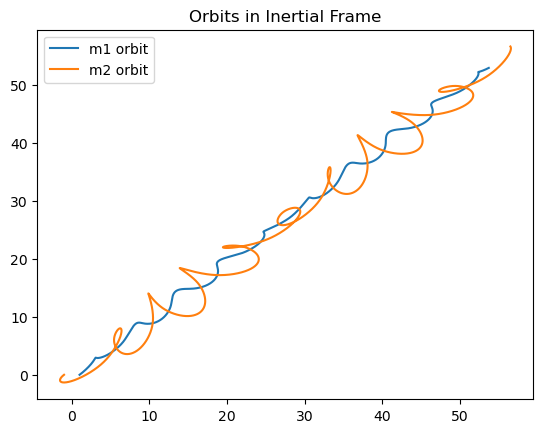

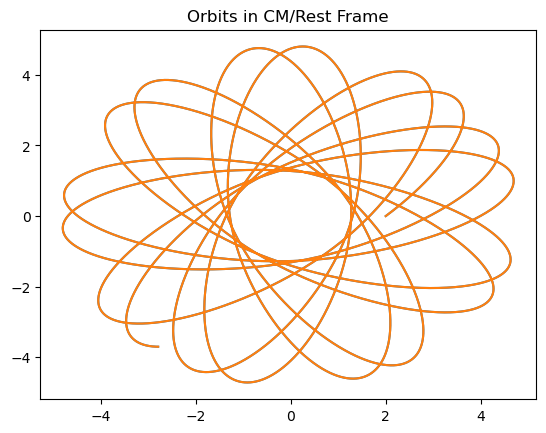

In [138]:
# set the inital conditions
r1_0 =   np.array([ 1, 0, 0])
r2_0 = - np.array([ 1, 0, 0])
v1_0 =   np.array([ 1, 1, 0])
v2_0 = - np.array([ 1, 1, 0])


TBP.orbits_plot(t_pts,r1_0,r2_0,v1_0,v2_0)

# Elliptic Orbits in Rest frame

In [155]:
# initialize masses
m1 = 1
m2 = m1*(1-1e-1)

TBP = TwoBodyProblem(m1,m2)

# Set the time interval
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

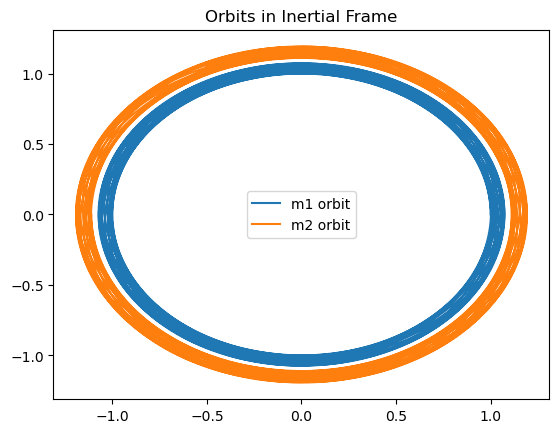

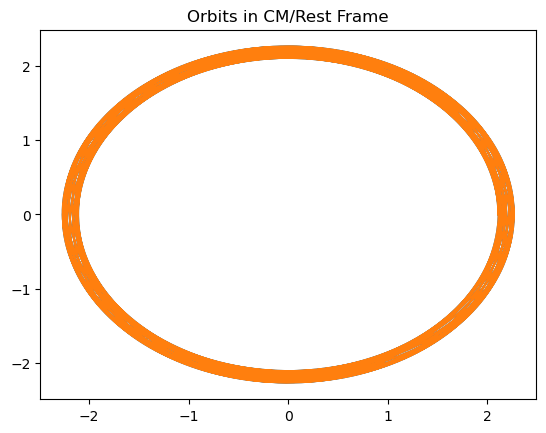

In [156]:
# set the inital conditions
r1_0 = np.array([ 1, 0, 0])
r2_0 = -(m1/m2) * np.array([1, 0, 0])
v1_0 = np.array([0, 1, 0])
v2_0 = - (m1/m2) * np.array([0, 1, 0])


TBP.orbits_plot(t_pts,r1_0,r2_0,v1_0,v2_0)

In [176]:
# initialize masses
m1 = 1
m2 = m1*0.8

TBP = TwoBodyProblem(m1,m2)

# Set the time interval
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

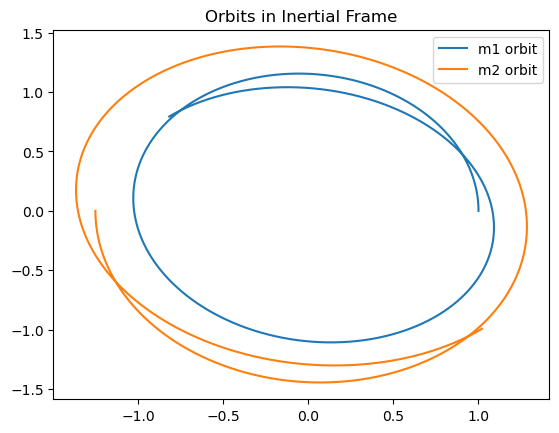

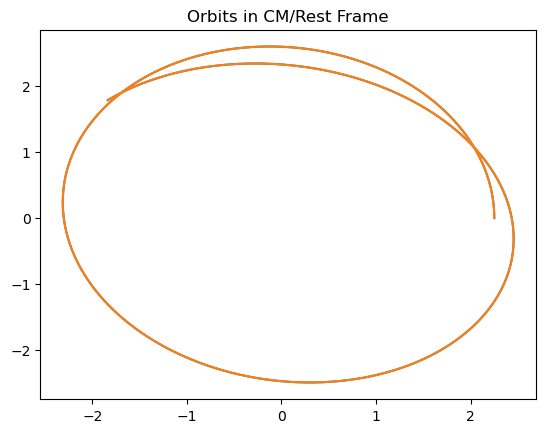

In [177]:
# set the inital conditions
r1_0 = np.array([ 1, 0, 0])
r2_0 = -(m1/m2) * np.array([1, 0, 0])
v1_0 = np.array([0, 1, 0])
v2_0 = - (m1/m2) * np.array([0, 1, 0])


TBP.orbits_plot(t_pts,r1_0,r2_0,v1_0,v2_0)

# Hyperbolic Orbits in Rest frame

In [145]:
# initialize masses
m1 = 1
m2 = m1*1e-3

TBP = TwoBodyProblem(m1,m2)

# Set the time interval
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

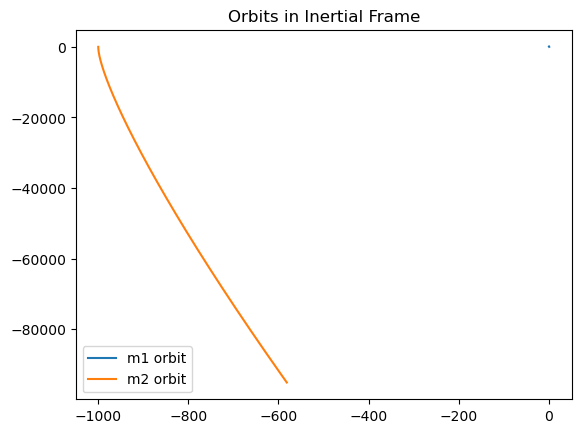

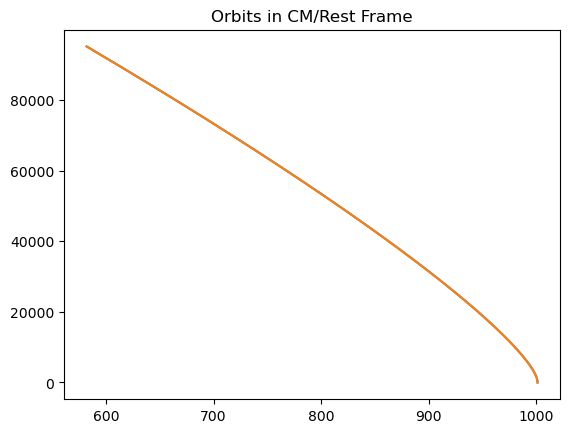

In [146]:
# set the inital conditions
r1_0 = np.array([ 1, 0, 0])
r2_0 = -(m1/m2) * np.array([1, 0, 0])
v1_0 = np.array([0, 1, 0])
v2_0 = - (m1/m2) * np.array([0, 1, 0])


TBP.orbits_plot(t_pts,r1_0,r2_0,v1_0,v2_0)